In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive 
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/My Drive/preprocessed_data_binary.csv')

In [4]:
df.drop(columns=df.columns[0], axis=1, inplace=True)
df

,name,recipe_id,rating,salt,butter,sugar,onion,water,eggs,olive oil,...,whole wheat tortillas,rubbed sage,dill pickle,hot red pepper flakes,orange extract,jasmine rice,chicken legs,clam juice,dried red pepper flakes,coarse black pepper
0,ant kelly s london broil marinade,155959,5,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,old ladies on a bus chicken,250833,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,sexy greek cocktail,423875,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,comfort able kamikaze,285606,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,gilded zucchini,457965,5,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4623,zucchini rice pilaf,282349,5,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4624,zucchini that s cheesy,316637,5,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4625,zucchini mushroom and pasta skillet,435485,5,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4626,zucchini carrot muffins,287490,5,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X = df.iloc[:,3:1161]

In [6]:
#from the recipee description of each dish, we have extracted the most recurring ingredients.
#Now we can describe each dish. i.e X.iloc[1] would return a df of length 1158 'total size of recurring ingredients chosen' showing if dish 1 contains ingredient n where n belongs [0,1158]
#We would like to find similarities on these dishes based on their ingredients alone. For this, we use the jaccard metric.
#J(A,B)= (A n B)/(A u B)

import scipy  
from scipy.spatial.distance import pdist, squareform

jaccard_distances = pdist(X.values, metric='jaccard') #performs jaccard on all dishes in DF X and returns them as a vector 
print(jaccard_distances)

[0.90909091 1.         1.         ... 0.94736842 0.875      0.85714286]


In [7]:
#we use the squareform function to turn the distance vector to a matrix
# Given a n * (n-1) / 2 sized vector v for some integer n >= 1 encoding distances as described:
#X = squareform(v) returns a n-by-n distance matrix X. The X[i, j] and X[j, i] values are set to v(nC2 - (n-i)C2 - (j-i-1)) and all diagonal elements are zero.
square_jaccard_distances = squareform(jaccard_distances)
print(square_jaccard_distances)

[[0.         0.90909091 1.         ... 0.92307692 1.         0.94117647]
 [0.90909091 0.         1.         ... 1.         1.         1.        ]
 [1.         1.         0.         ... 1.         1.         1.        ]
 ...
 [0.92307692 1.         1.         ... 0.         0.94736842 0.875     ]
 [1.         1.         1.         ... 0.94736842 0.         0.85714286]
 [0.94117647 1.         1.         ... 0.875      0.85714286 0.        ]]


In [8]:
square_jaccard_similarity = 1 - square_jaccard_distances # since we care about similarities : similarities = 1 - differences
print(square_jaccard_similarity)
print(type(square_jaccard_similarity))

[[1.         0.09090909 0.         ... 0.07692308 0.         0.05882353]
 [0.09090909 1.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.07692308 0.         0.         ... 1.         0.05263158 0.125     ]
 [0.         0.         0.         ... 0.05263158 1.         0.14285714]
 [0.05882353 0.         0.         ... 0.125      0.14285714 1.        ]]
<class 'numpy.ndarray'>


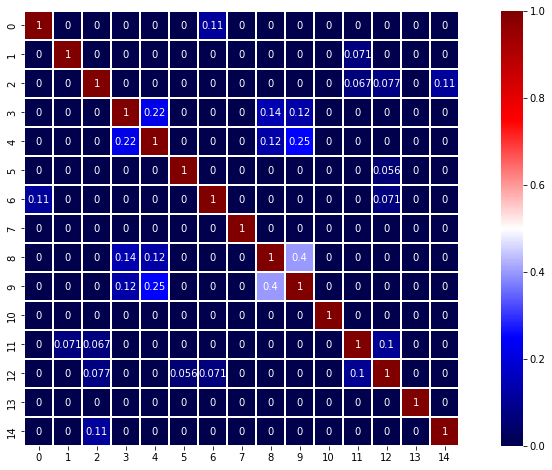

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
test = square_jaccard_similarity[40:55,40:55]
plt.figure(figsize=(15,8))
sns.heatmap(test, annot=True, cmap='seismic', square=True, linewidths=0.5);

In [10]:
#now we create a dataframe distance_df that contains each dish as an index and each dish as a column, the value (i,j) is the similarity of the 2 dishes
distance_df = pd.DataFrame(square_jaccard_similarity,
                            index=df['name'],
                            columns=df['name'])
distance_df

name,ant kelly s london broil marinade,old ladies on a bus chicken,sexy greek cocktail,comfort able kamikaze,gilded zucchini,in the pink lemonade,need a pick me up banana peanut butter smoothie no,p anana confetti circles,pancakes in a bowl,s wonderful carrot and raisin salad,...,zucchini italiano,zucchini lasagna lasagne low carb,zucchini lemon cake,zucchini oatmeal bread,zucchini raisin cookies,zucchini rice pilaf,zucchini that s cheesy,zucchini mushroom and pasta skillet,zucchini carrot muffins,zuke not cuke hamburger hotdog relish
name,,,,,,,,,,,,,,,,,,,,,
ant kelly s london broil marinade,1.000000,0.090909,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.058824
old ladies on a bus chicken,0.090909,1.000000,0.0,0.0,0.000000,0.111111,0.000000,0.0,0.000000,0.083333,...,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
sexy greek cocktail,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
comfort able kamikaze,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
gilded zucchini,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.111111,0.0,0.000000,0.076923,...,0.100000,0.050000,0.200000,0.187500,0.125000,0.100000,0.181818,0.083333,0.266667,0.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zucchini rice pilaf,0.000000,0.000000,0.0,0.0,0.100000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.111111,0.111111,0.062500,0.058824,0.062500,1.000000,0.200000,0.090909,0.125000,0.066667
zucchini that s cheesy,0.000000,0.000000,0.0,0.0,0.181818,0.000000,0.000000,0.0,0.000000,0.071429,...,0.200000,0.100000,0.117647,0.111111,0.117647,0.200000,1.000000,0.166667,0.111111,0.200000
zucchini mushroom and pasta skillet,0.076923,0.000000,0.0,0.0,0.083333,0.000000,0.000000,0.0,0.000000,0.000000,...,0.200000,0.157895,0.055556,0.052632,0.055556,0.090909,0.166667,1.000000,0.052632,0.125000


In [11]:
print(distance_df['zucchini carrot muffins'].sort_values(ascending = False ).head(4))

name
zucchini carrot muffins                     1.000000
zucchini bars with cream cheese frosting    0.500000
jacqueline s zucchini muffins               0.500000
garden harvest quick bread                  0.473684
Name: zucchini carrot muffins, dtype: float64


In [12]:
print(distance_df['saucy  chicken'].sort_values(ascending = False ).head(4))

name
saucy  chicken               1.000000
balsamic barbecue chicken    0.461538
good bbq sauce               0.357143
pita sloppy joe              0.312500
Name: saucy  chicken, dtype: float64


In [13]:
print(distance_df['cheesy bacon potatoes'].sort_values(ascending = False ).head(4))

name
cheesy bacon potatoes                            1.000000
everything   sauce   for baked potatoes          0.666667
1 potato 2 potato                                0.625000
unbreaded jalapeno poppers with double cheese    0.333333
Name: cheesy bacon potatoes, dtype: float64
